In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

import sys
from pathlib import Path

#some extra params for graphics
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [30]:
# Set up paths
NOTEBOOK_DIR = Path.cwd()
SRC_DIR = NOTEBOOK_DIR.parent / "src"
sys.path.append(str(SRC_DIR))

# Import the shared paths
from paths import CSV_DIR, DATAFRAMES_DIR

In [32]:
df_teide = pd.read_parquet(DATAFRAMES_DIR / "df_teide_full_Info.parquet")
df_roque = pd.read_parquet(DATAFRAMES_DIR / "df_roque_full_Info.parquet")

In [33]:
df_teide.columns

Index(['Site', 'Star', 'cplane', 'sep', 'Deltah0', 'Res', 'hbegin', 'hend',
       'Seeing_totatm', 'bl', 'fa', 'altitude', 'turbulence', 'profile_id',
       'timestamp_begin', 'timestamp_end', 'seconds_since_midnight_begin',
       'seconds_since_midnight_end', 'sin_time_begin', 'cos_time_begin',
       'sin_time_end', 'cos_time_end', 'duration', 'hour',
       'timestamp_begin_date', 'Year', 'Month', 'Day', 'Temperature',
       'Humidity', 'Wind_dir', 'Wind_speed', 'Pressure', 'Solar_radiation',
       'turbulence_log'],
      dtype='object')

In [36]:
def generate_corr_matrix(data_df,width,height):
    """
    Parameters
    ----------
    data_df : DataFrame with the deisred columns to calculate the correlation matrix
    width,height : Size for the resulting figure of the correlation matrix

    Returns
    -------
    correlation_matrix : correlation matrix object as DataFrame
    """
    correlation_matrix = data_df.corr()
    plt.figure(figsize=(width, height))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
    plt.title('Correlation Heatmap')
    plt.xticks(rotation=45)
    plt.show()

    return correlation_matrix

In [38]:
# Drop non-numerical columns in both DataFrames
df_numerical_teide = df_teide._get_numeric_data()
df_numerical_roque = df_roque._get_numeric_data()

### Correlation matrix

In [41]:
#Visualize numerical column names
df_numerical_teide.columns

Index(['cplane', 'sep', 'Deltah0', 'hbegin', 'hend', 'Seeing_totatm', 'bl',
       'fa', 'altitude', 'turbulence', 'profile_id',
       'seconds_since_midnight_begin', 'seconds_since_midnight_end',
       'sin_time_begin', 'cos_time_begin', 'sin_time_end', 'cos_time_end',
       'duration', 'hour', 'Year', 'Month', 'Day', 'Temperature', 'Humidity',
       'Wind_dir', 'Wind_speed', 'Pressure', 'Solar_radiation',
       'turbulence_log'],
      dtype='object')

In [43]:
#Select the most relevant ones except the time-related which are calculated from timestamp  
selected_columns = ['altitude','Seeing_totatm', 'bl',
       'fa', 'duration','Temperature','hbegin','hend', 'Wind_speed',
       'Humidity', 'Wind_dir', 'Pressure', 'Solar_radiation','turbulence']

In [45]:
#Calculate correlation matrix but selecting some of them based on area experience
#Basically meteo variables, time variables, and some selected metadata.
df_teide_selected = df_numerical_teide[selected_columns]
df_roque_selected = df_numerical_roque[selected_columns]

#### Teide

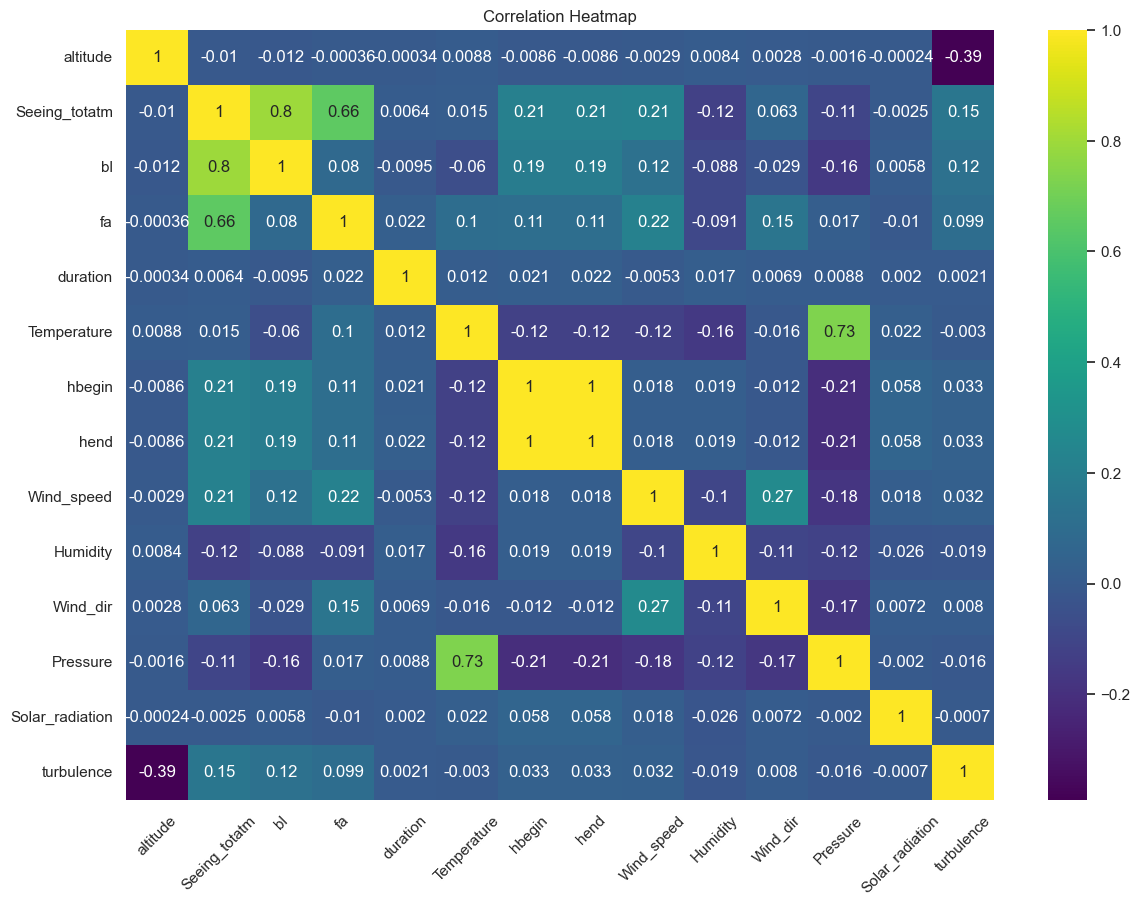

In [47]:
corr_teide = generate_corr_matrix(df_teide_selected,14,10)

#### Roque

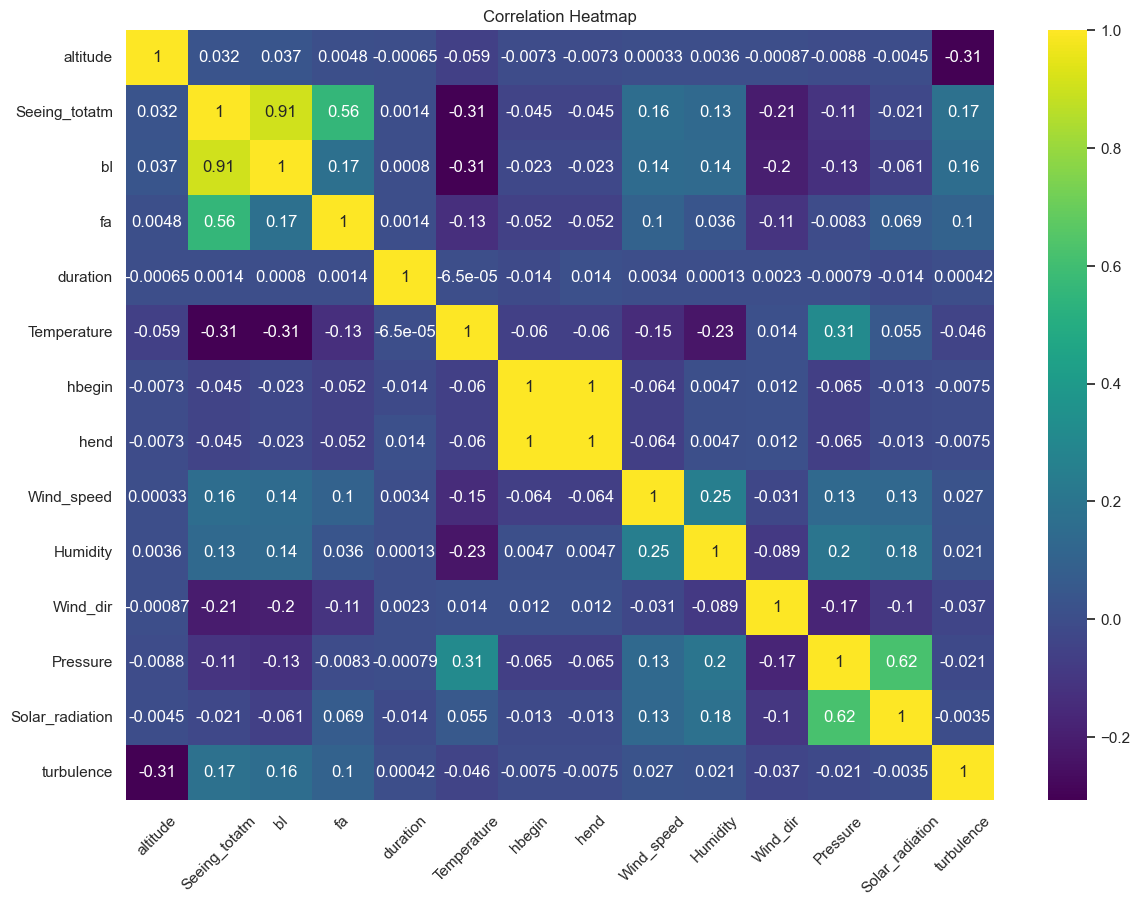

In [49]:
corr_roque = generate_corr_matrix(df_roque_selected,14,10)

In [50]:
#Get the top X columns with highest value in relation with turbulence 
top_cols_teide = corr_teide.nlargest(6,'turbulence')['turbulence'].index
top_cols_roque = corr_roque.nlargest(6,'turbulence')['turbulence'].index

In [52]:
#Plot histogram and kde(density) for each one of the top_cols per observatory 
def hist_kde_pairPlots(columns_list, data ):
     for i in range(len(columns_list)):
        fig, ax = plt.subplots(1,2, figsize=(24,6))
        sns.histplot(data=data[columns_list[i]],ax=ax[0], )
        sns.kdeplot(data=data[columns_list[i]], ax=ax[1], fill = True)

#### Teide

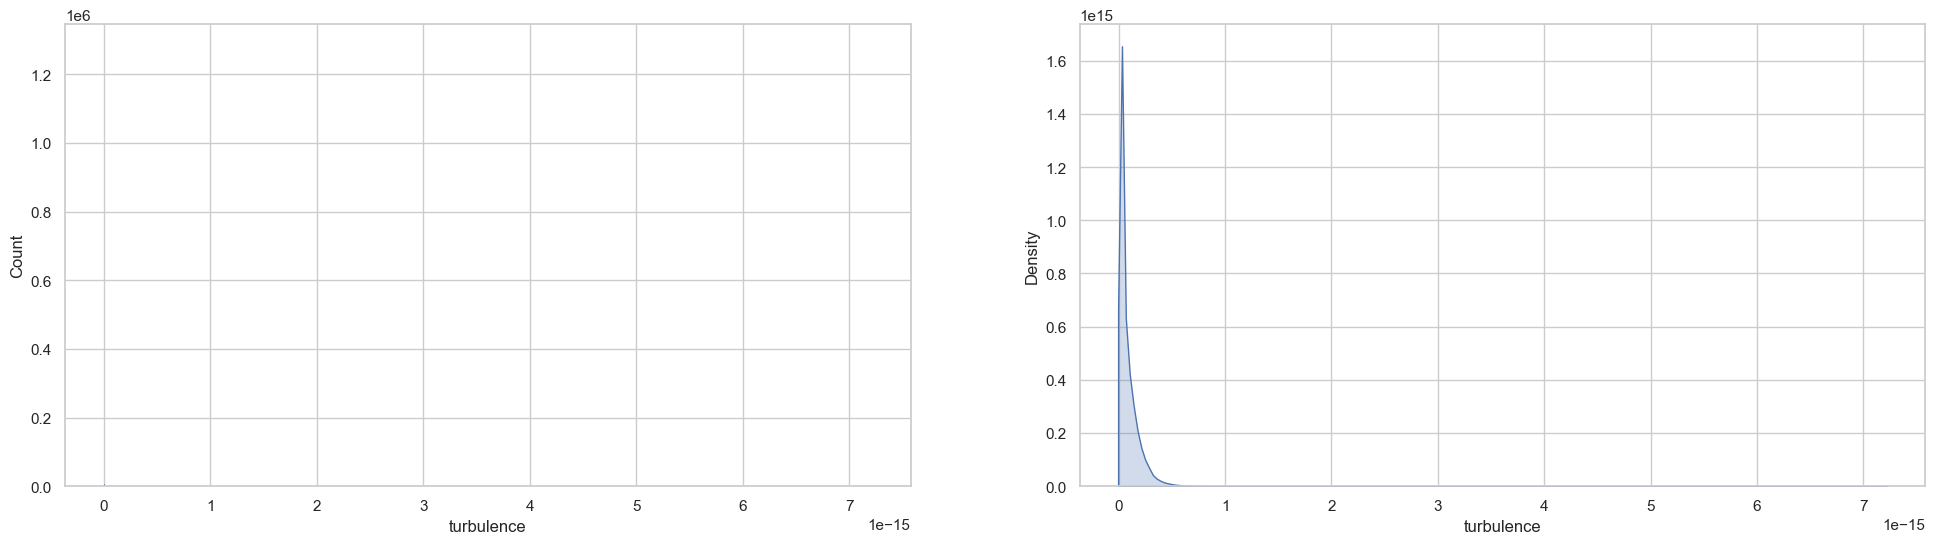

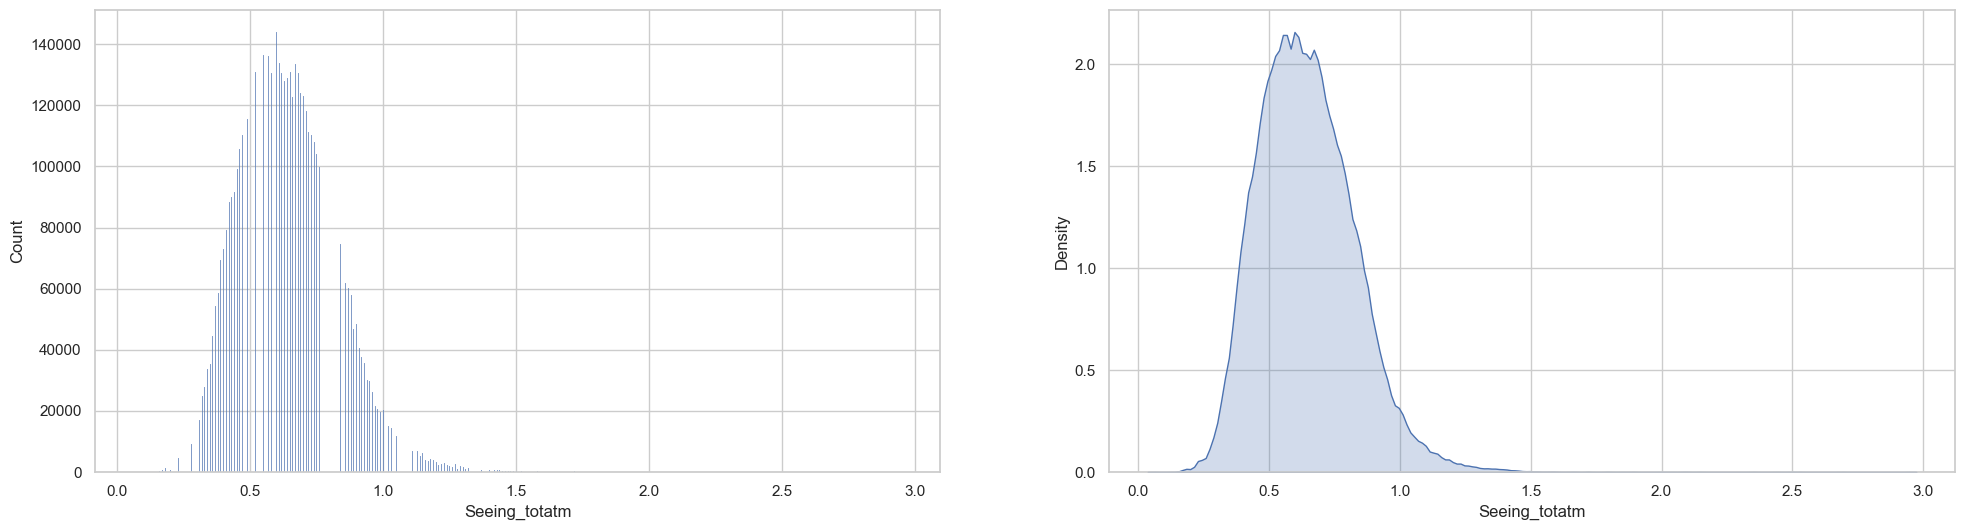

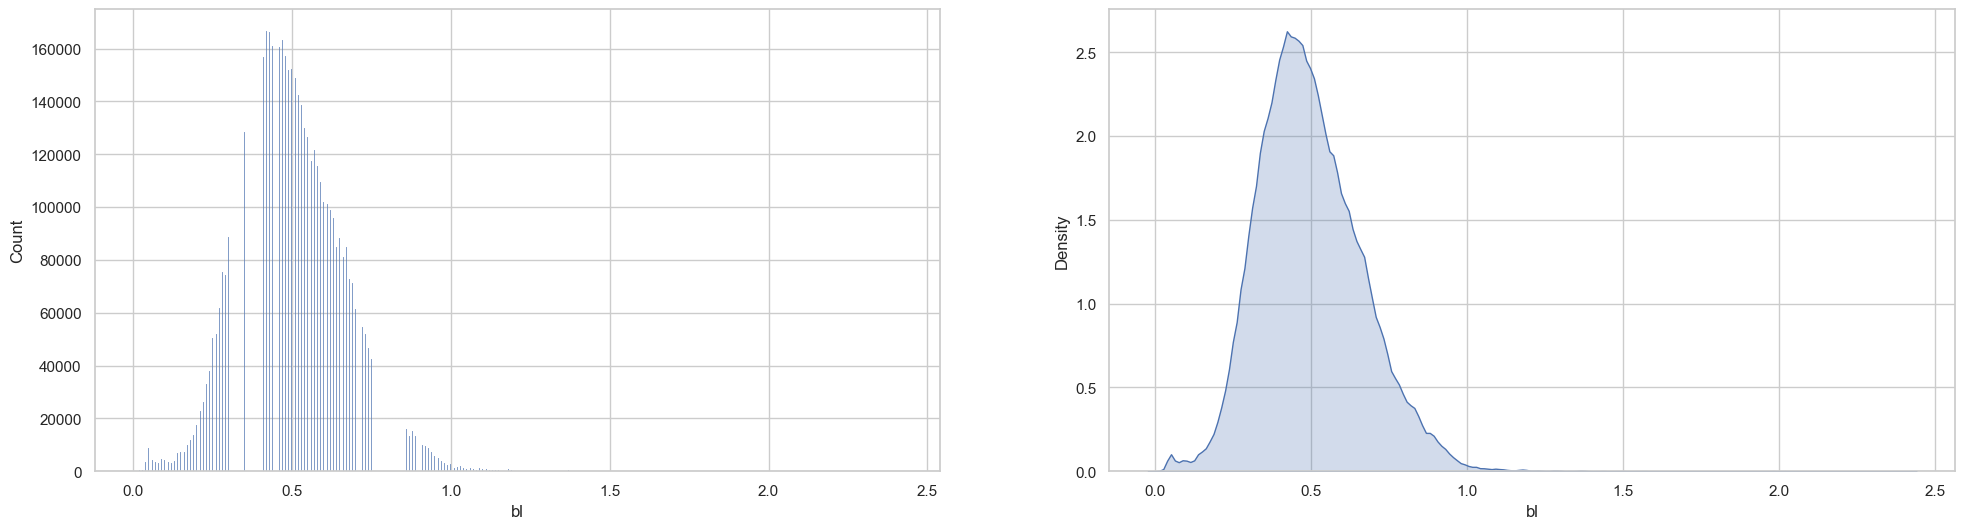

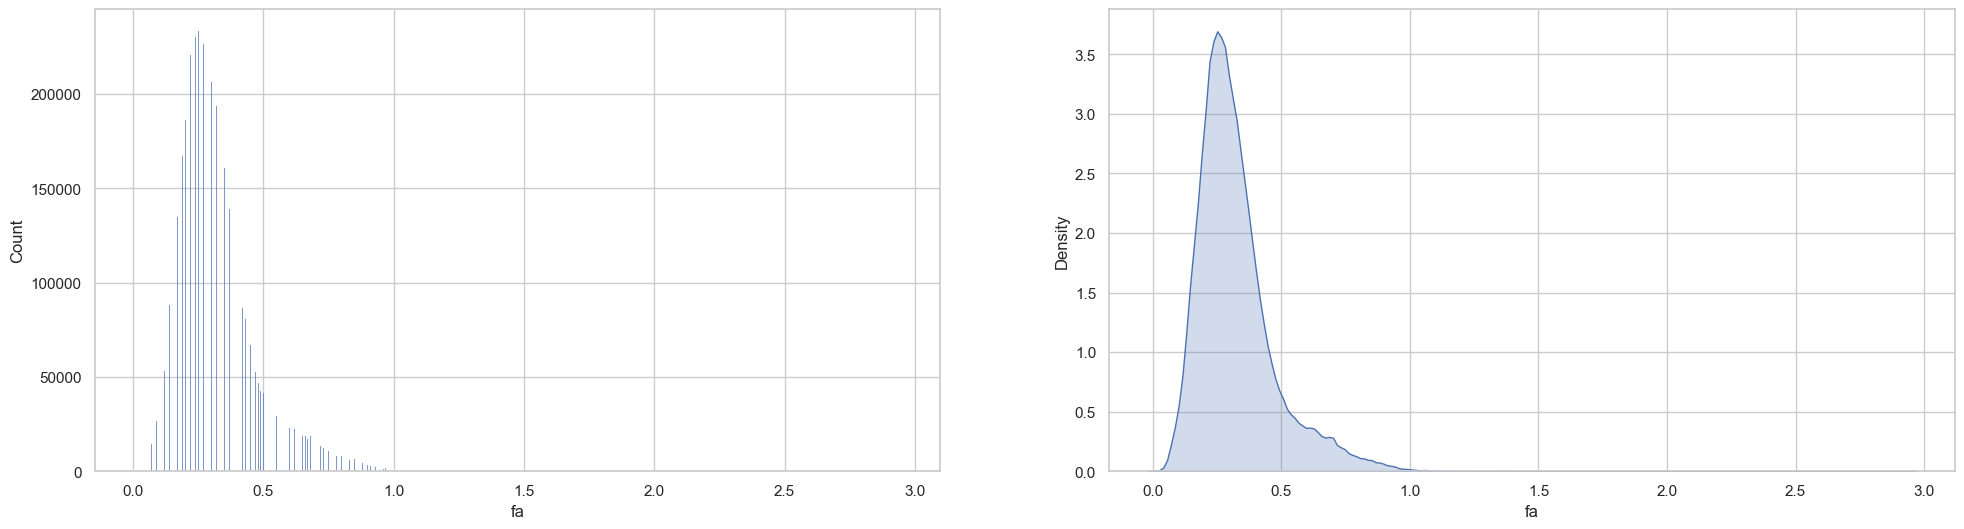

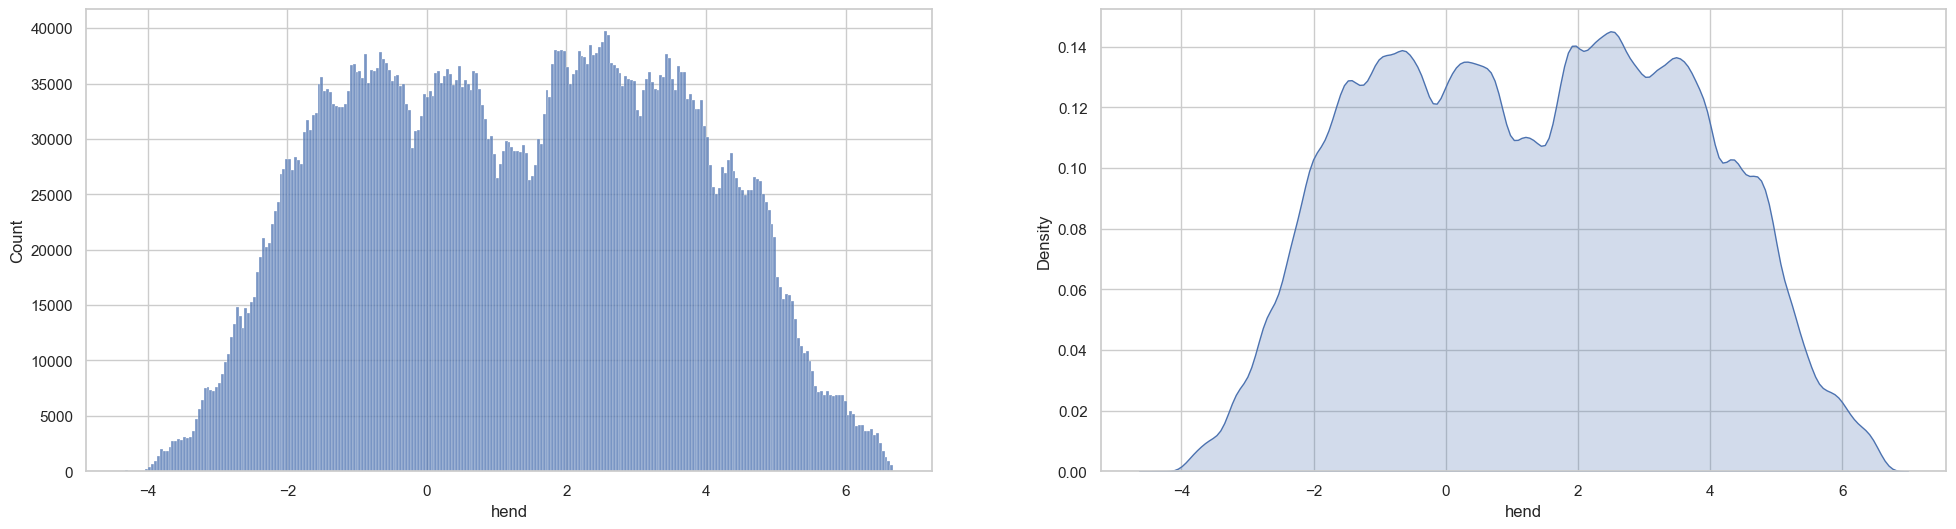

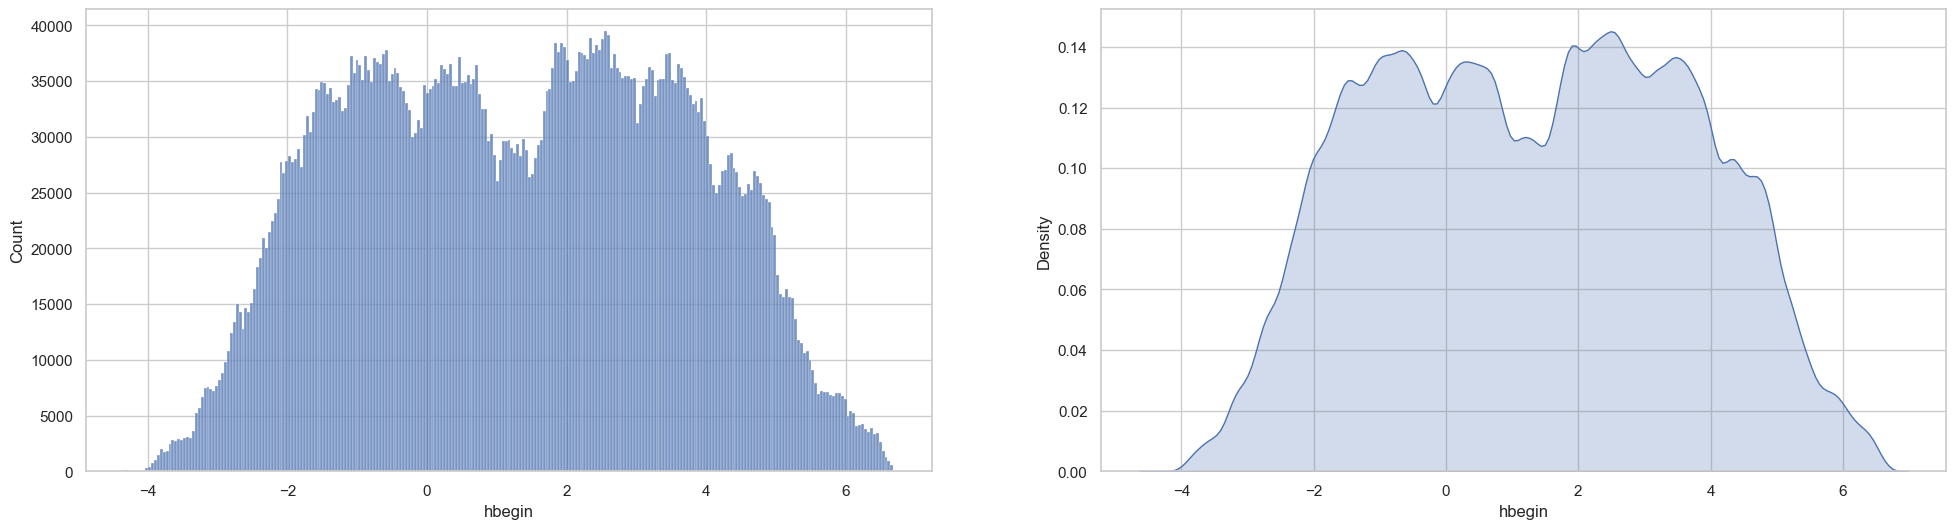

In [54]:
hist_kde_pairPlots(top_cols_teide, df_teide)

#### Roque

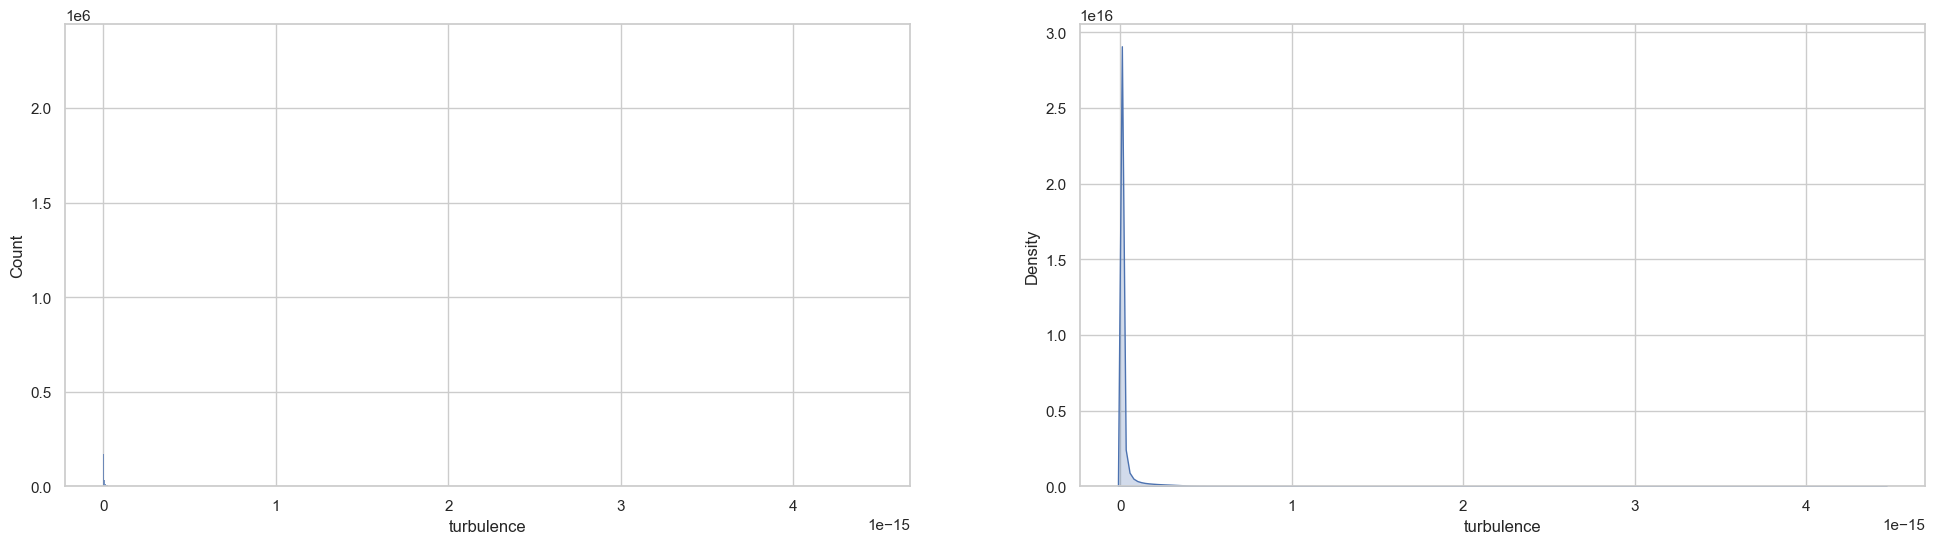

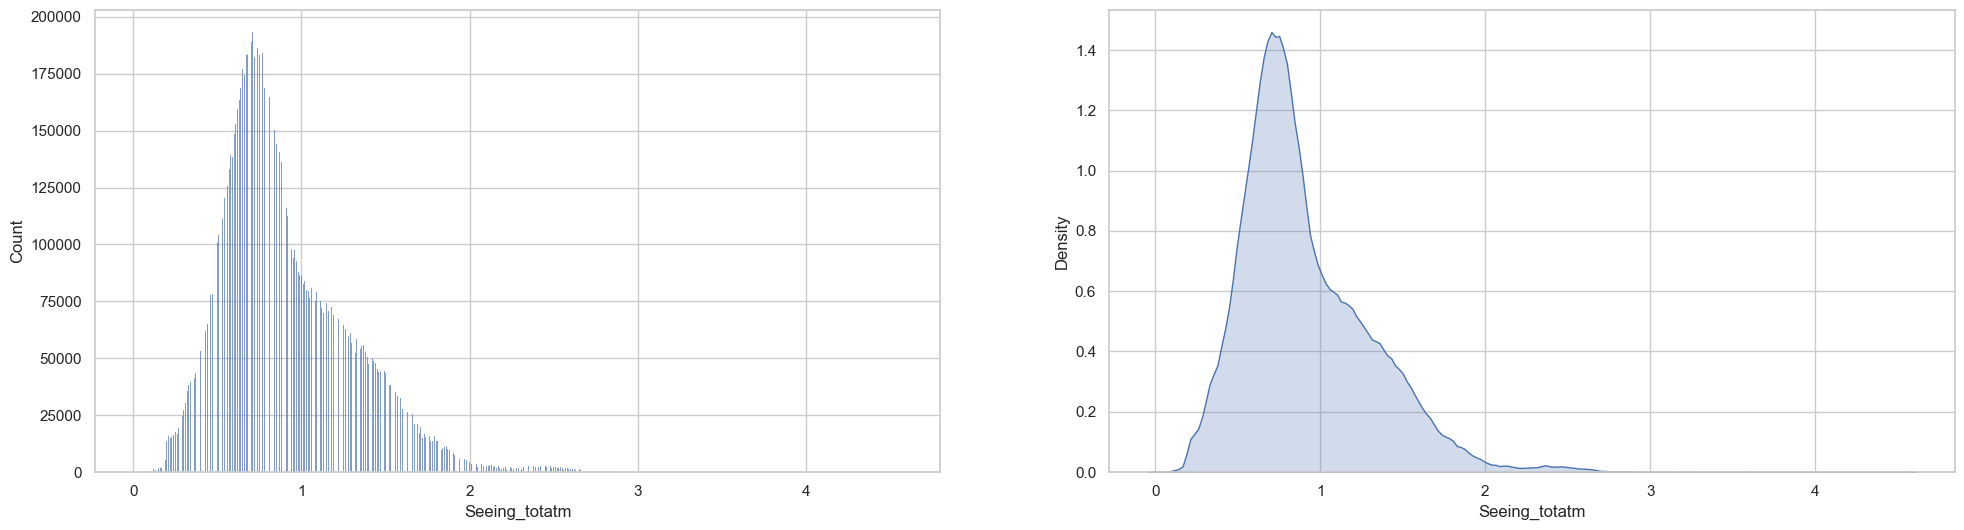

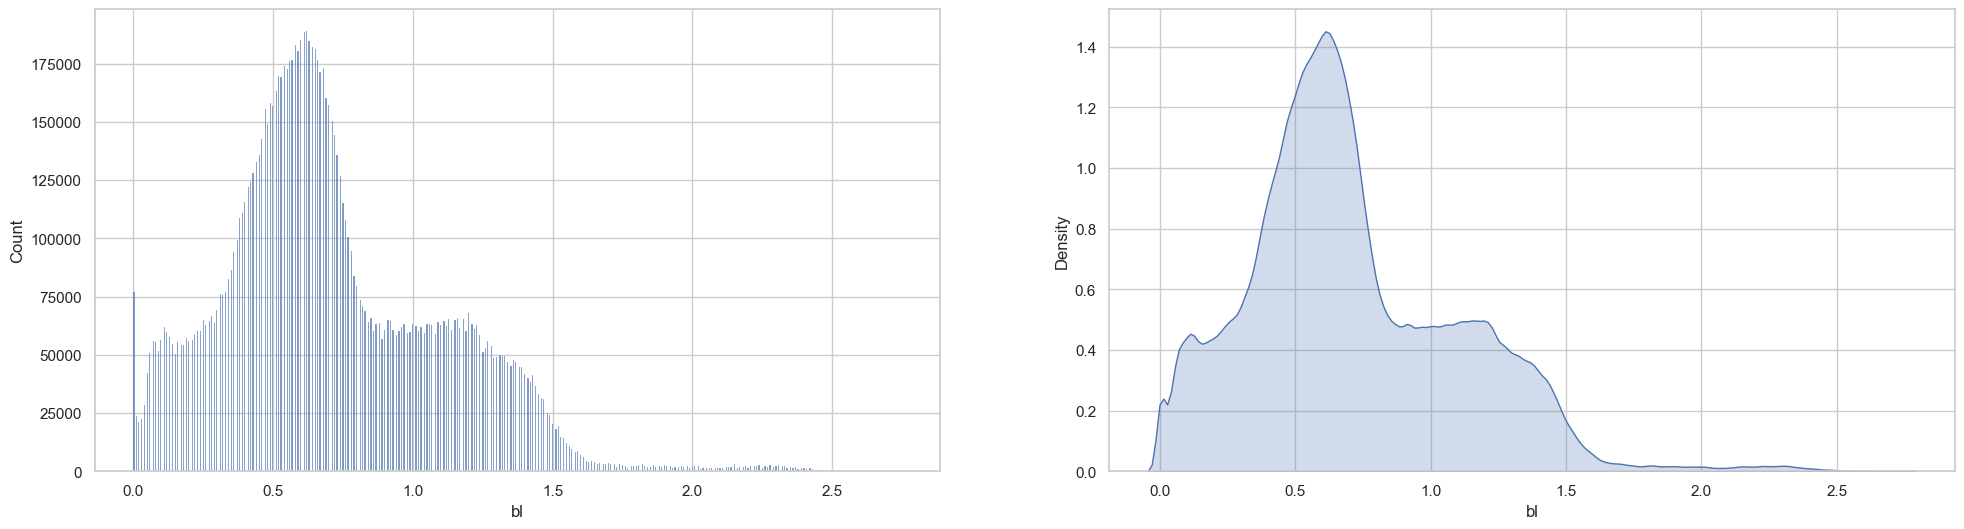

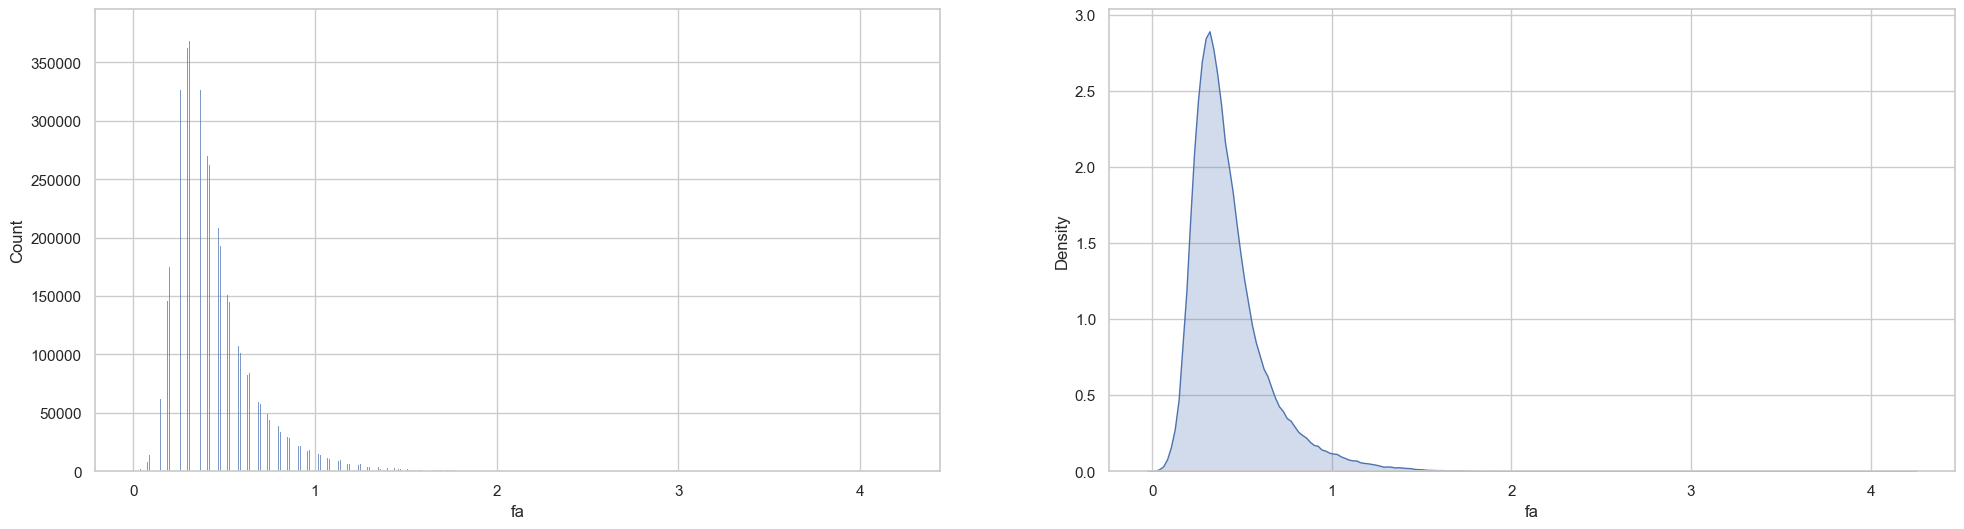

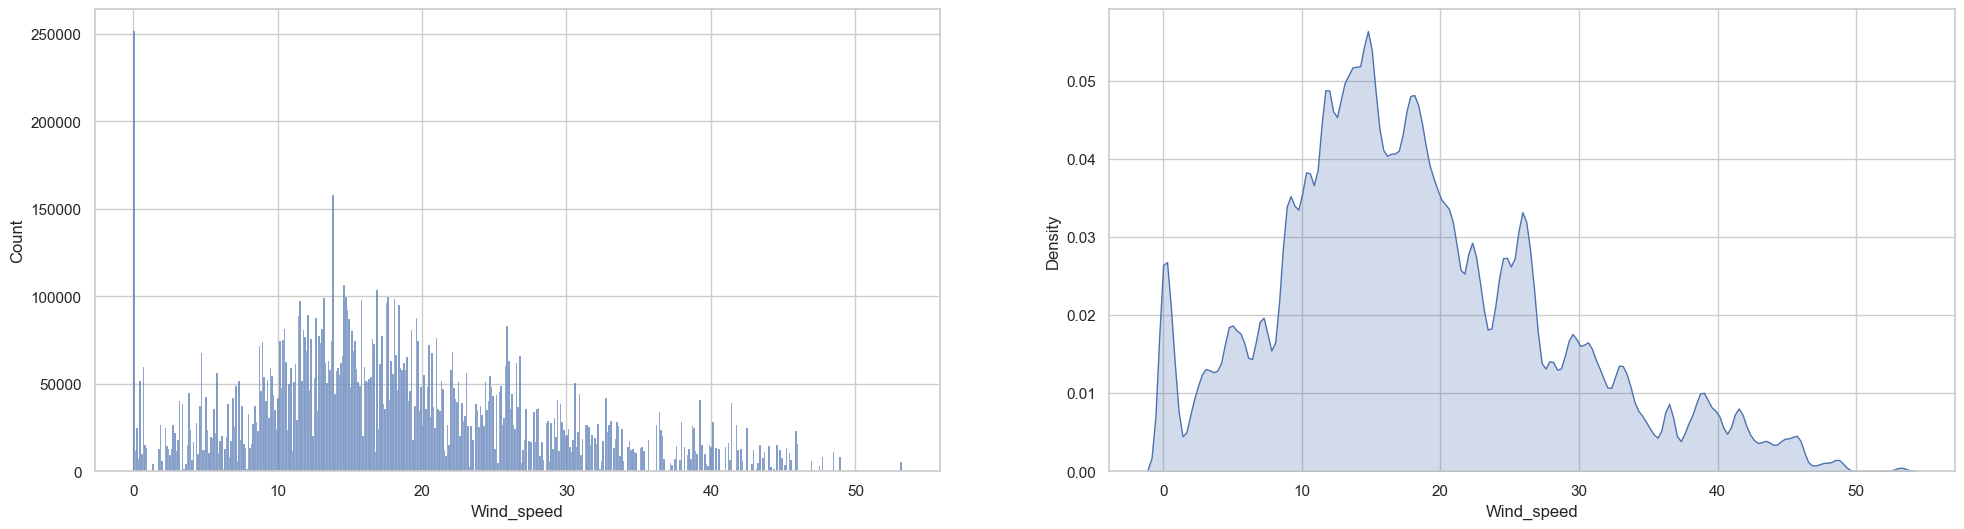

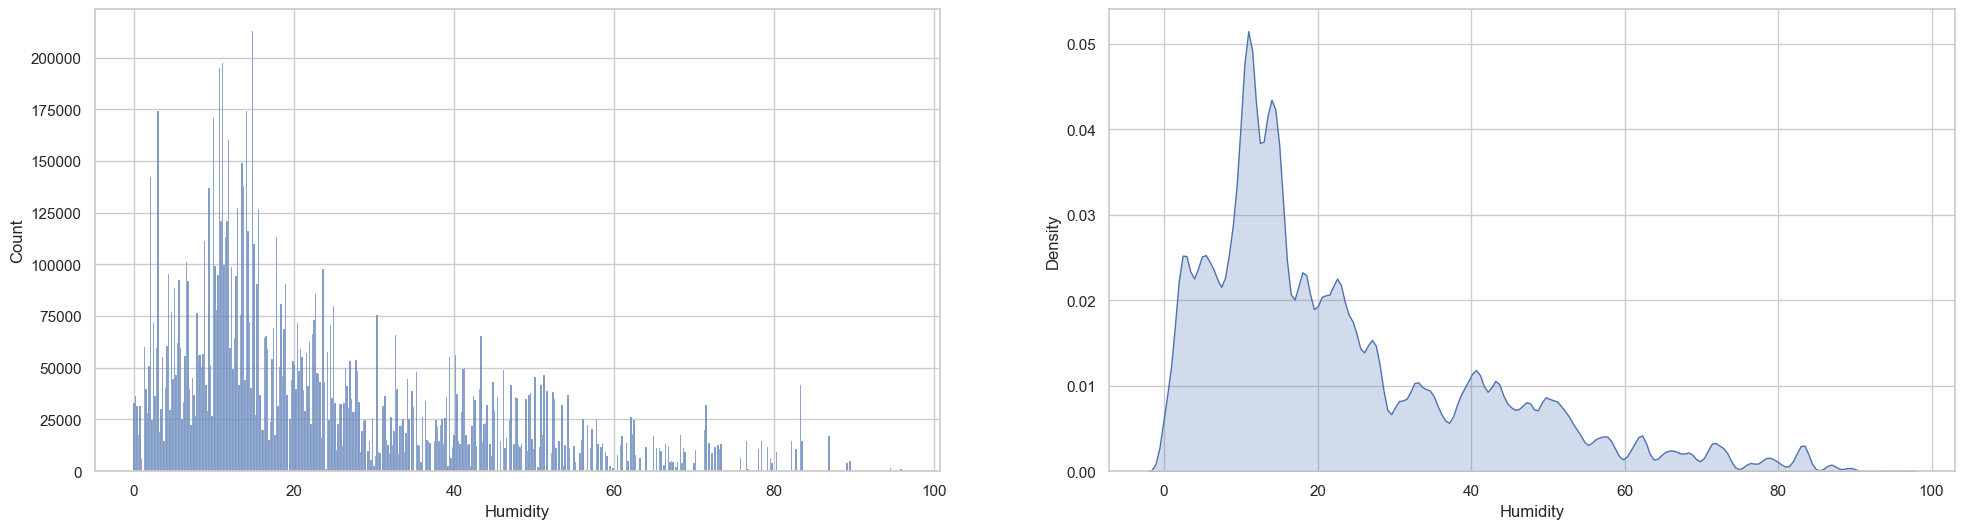

In [56]:
hist_kde_pairPlots(top_cols_roque, df_roque)